<a href="https://colab.research.google.com/github/se-nishioka/MachineLearningWithPython/blob/master/Chapter01_%E3%81%AF%E3%81%98%E3%82%81%E3%81%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 必要なライブラリとツール

## NumPy
多次元配列機能や線形代数、フーリエ変換、擬似乱数生成器など高レベルの数学関数が用意されている

In [0]:
#NumPy
import numpy as np
x=np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


## SciPy
Pythonで科学技術計算を行うための関数が集められたライブラリ
高度な線形代数ルーチンや数学関数の最適化、信号処理、投手な数学関数などが用意されている。

In [0]:
# SciPy サイパイ
from scipy import sparse

# 対角成分が1でそれ以外が0の２次元NumPy配列を作る
eye=np.eye(4)
print('Numpy array:\n{}'.format(eye))

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [0]:
# NumPy配列をSciPyのCRS形式の疎行列に変換する
# 非ゼロ要素だけ格納される
# CRS (Compressed Row Storage) 
sparse_matrix=sparse.csr_matrix(eye)
print('\nSciPy sparse CSR matrix:\n{}'.format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


## matplotlib
科学技術向けのグラフ描画ライブラリ。
折れ線グラフ、ヒストグラム、散布図などの描画が可能

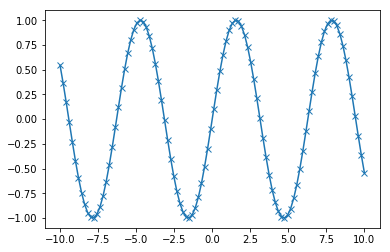

In [0]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

# -10から10までを100ステップに区切った列を配列として生成
x=np.linspace(-10,10,100)
#サイン関数を用いて２つ目の配列を生成
y=np.sin(x)
#plot関数は一方の配列に対して他方の配列をプロットする
plt.plot(x,y,marker="x")

##Pandas
データを変換したり解析したりするライブラリ。RのDataFrameを模して作られたDataFrameというデータ構造を中心に構成されている

In [0]:
import pandas as pd

#人を表す簡単なデータセットを作成する
data={
    'Name':['John','Anna','Peter','Linda'],
    'Location':['New York','Paris','Berlin','London'],
    'Age':[24,13,53,33]
}
data_pandas=pd.DataFrame(data)

#IPython.displayを用いるとDataFrameをJupyter Notebook上できれいに表示することが出来る
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [0]:
#ageカラムが30以上の行を取り出す
display(data_pandas[data_pandas.Age>30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


# 最初のアプリケーション：アイリスのクラス分布

## データを読む

In [0]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()
# from sklearn.datasets import load_iris as li
# iris_dataset=li()

In [0]:
# データセットのキー項目を確認
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
# DESCRに説明が記載されている
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [0]:
# target_namesに予測されている種類の文字列が格納されている
print("Target names:{}".format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [0]:
# fearute_namesにそれぞれの特徴量の説明が格納されている
print("Feature names:{}\n".format(iris_dataset['feature_names']))
# ガクの長さ、ガクの幅、花弁の長さ、花弁の幅

Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



In [0]:
# NumPy配列として格納されている
print("type of data:{}".format(type(iris_dataset["data"])))

type of data:<class 'numpy.ndarray'>


In [0]:
# 150レコードと4つの*特徴量*を持つレコードが格納されている
print("shape of data:{}".format(iris_dataset['data'].shape))

shape of data:(150, 4)


In [0]:
# 先頭5つの花の情報を表示
print("first five columns of data:\n{}".format(iris_dataset['data'][:5]))

first five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
# 配列TargetもNumPy配列として格納されている
print("type of target:{}".format(type(iris_dataset['target'])))

type of target:<class 'numpy.ndarray'>


In [0]:
# targetは1次元配列で150で、個々の花に１つのエントリが対応する
print("shape of target:{}".format(iris_dataset['target'].shape))

shape of target:<class 'numpy.ndarray'>


In [0]:
# 種類は0から2までの整数としてエンコードされている
print("target:\n{}".format(iris_dataset['target']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
#これらの整数の意味は配列iris_dataset['target_names']にて定義されている
print("target names:\n{}".format(iris_dataset['target_names']))

target names:
['setosa' 'versicolor' 'virginica']


## 成功度合いの測定：訓練データとテストデータ
測定モデルの計測が汎化(generalize)貸しているかを判定するため、データを訓練データと検証データに分ける必要がある

In [0]:
from sklearn.model_selection import train_test_split

# データを訓練データ,検証データ,訓練ラベル，検証ラベルに分ける。訓練と検証の割合は75:25
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [0]:
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))

print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(112, 4)
y_train shape:(112,)
X_test shape:(38, 4)
y_test shape:(38,)


##  最初にスべきこと：データを良く観察する
MLモデルを構築する前にデータを検査するべきである。MLでなくても簡単に溶ける問題があるかも知れない。
これらのソリューションとして散布図が有効である

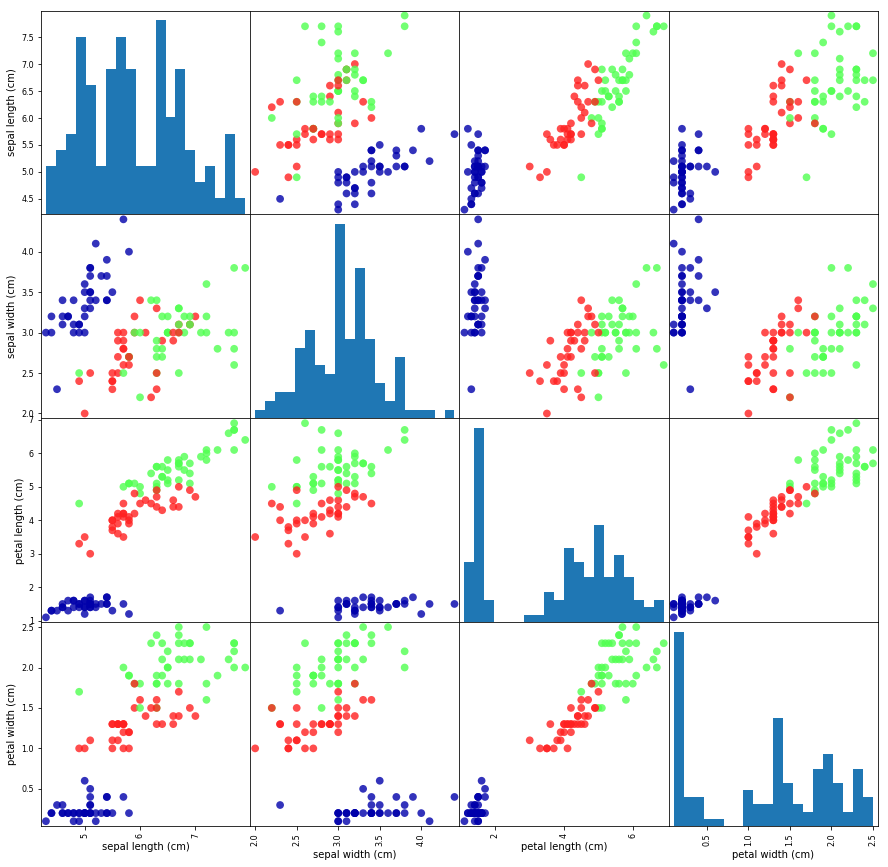

In [0]:
# このimportがハマりポイント
from pandas.plotting import scatter_matrix

# X_trainのデータからDataFrameを作る
# iris_dataset.feature_nameの文字列を使ってカラムに名前をつける
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)

# データフレームからscatter matrixを作成し、y_trainに従って色を付ける
grr=scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)


## 最初のモデル：k-最近傍法(kさいけんぼうほう)
k最近傍法(k-Nearest Neighbors)によるクラス分類を行う。このモデルはわかりやすくてシンプルな部類。
これはneighborsモジュールのKNeighborsClassifierクラスに実装されている。最も重要なパラメータは近傍点の数だが、ここでは1としている

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#K最近傍法モデルをインスタンス化
knn=KNeighborsClassifier(n_neighbors=1)
# 訓練セットからモデルを構築するためにfitメソッドを実行する
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

##予測を行う


In [0]:
# 予測用のデータを作成
X_new=np.array([[5,2.9,1,0.2]])
print("X_new.shape:{}".format(X_new.shape))
# 予測を行うにはpredictメソッドを呼ぶ
prediction=knn.predict(X_new)
print("Prediction:{}".format(prediction))
# targetの文字列を辞書から取得して表示
print("Predicted target name:{}".format(iris_dataset['target_names'][prediction]))

X_new.shape:(1, 4)
Prediction:[0]
Predicted target name:['setosa']


## モデルの評価
テストデータを利用してモデルの*精度*(accuracy)を計算測定する。精度は正しく品種を予測できたアイリスの割合である

In [0]:
# テストデータで予測モデルを適用してみる
y_pred=knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))
print("Test set originaldata:\n{}".format(y_test))
# テストのスコアを表示
print("Test set score:{:.2f}".format(np.mean(y_pred==y_test)))
# 別の方法でテストのスコアを表示
print("Test set score:{:.2f}".format(knn.score(X_test,y_test)))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set originaldata:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Test set score:0.97
Test set score:0.97
